## The World's Least Efficient Adding Machine

**A feed-forward neural network that trains to add 1 + 1 (in binary).**<br>

$0+0=0$<br>
$0+1=1$<br>
$1+0=1$<br>
$1+1=10$<br>

In [5]:
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0,0],[0,1],[0,1],[1,0]])
hidden_size = 4
W0 = 2 * np.random.random((2, hidden_size)) - 1
W1 = 2 * np.random.random((hidden_size, 2)) - 1
alpha = 0.05

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_to_sigmoid_prime(s_of_x):
    return s_of_x * (1 - s_of_x)

for i in range(0,100000):
    # feed-forward values
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0, W0))  # multiply layer0 by weights, then activate
    layer_2 = sigmoid(np.dot(layer_1, W1))
    # back propogate errors
    layer_2_error = y - layer_2
    layer_2_delta = layer_2_error * sigmoid_to_sigmoid_prime(layer_2)
    layer_1_error = layer_2_delta.dot(W1.T)
    layer_1_delta = layer_1_error * sigmoid_to_sigmoid_prime(layer_1)
    
    W1 += alpha * layer_1.T.dot(layer_2_delta)
    W0 += alpha * layer_0.T.dot(layer_1_delta)

print('===========')
print('RESULTS')
for i in range(0, len(layer_2)):
    a = 1 if layer_2[i][0] > 0.5 else 0
    b = 1 if layer_2[i][1] > 0.5 else 0
    print(X[i][0],'+',X[i][1],'=',a,b)
print('===========')

RESULTS
0 + 0 = 0 0
0 + 1 = 0 1
1 + 0 = 0 1
1 + 1 = 1 0


==========================================================================<br>
Import numpy -- that handles linear algebra (and other useful math stuff)

In [ ]:
import numpy as np

Create all possible inputs, as a numpy array (each row represents one set of inputs):

In [6]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

Create the related (correct) set of outputs... the neural network will train to these results:

In [7]:
y = np.array([[0,0],[0,1],[0,1],[1,0]])
y

array([[0, 0],
       [0, 1],
       [0, 1],
       [1, 0]])

Notice that each input row relates 1:1 to an output row, for example:

In [9]:
print(X[2],y[2])

[1 0] [0 1]


...or to produce the entire truth table...

In [11]:
for i in range(0, len(X)):
    print(X[i],'->',y[i])

[0 0] -> [0 0]
[0 1] -> [0 1]
[1 0] -> [0 1]
[1 1] -> [1 0]


Set up a neural network with one hidden layer; initialize random weights to allow forward propogation. The network will have one hidden layer. Start by specifying the size (width) of the hidden layer.

In [ ]:
hidden_size = 4

Initialize a random set of weights that allow inputs to be propogated into the hidden layer. One weight is required to represent the impact of each input on each node of the hidden layer. There are two inputs and four hidden nodes, so the weights need to be 2x4:

In [12]:
W0 = 2 * np.random.random((2, hidden_size)) - 1
W0

array([[ 0.24930343, -0.4406158 , -0.90512732,  0.7128532 ],
       [-0.79008149, -0.73063072, -0.47393487, -0.71743393]])

Initialize a random set of weights that allow outputs from the hidden layer to be propogated into outputs of the network. There are four nodes in the hidden layer, and two outputs, so the weights need to be 4x2:

In [13]:
W1 = 2 * np.random.random((hidden_size, 2)) - 1
W1

array([[-0.81445752,  0.12882471],
       [ 0.90862417, -0.80702739],
       [-0.32318397, -0.99912121],
       [-0.10828113,  0.8507689 ]])

Define a learning rate (errors will be incrementally corrected based on this rate, which may require tuning to get the correct results):

In [ ]:
alpha = 0.05

Here is a conventional function that converts a continuous result into a **yes** or **no**, more or less.

In [ ]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

The function works well because it **divides** continous inputs into *just-about-one* or *basically-zero*:

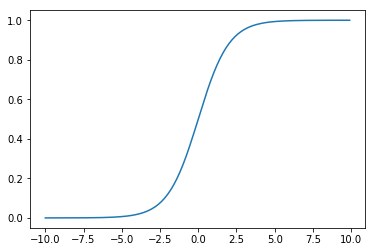

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(-10,10,0.1), sigmoid(np.arange(-10,10,.1)))

To measure the gradient of errors, it's also necessary to use the first derivative of that function, which is shaped in a way to say *get away from the transition... head for the extremes*:

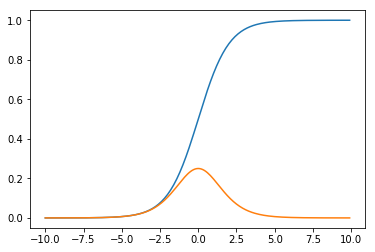

In [20]:
def sigmoid_to_sigmoid_prime(s_of_x):
    return s_of_x * (1 - s_of_x)

plt.plot(np.arange(-10,10,0.1), sigmoid(np.arange(-10,10,.1)))
plt.plot(np.arange(-10,10,0.1), sigmoid_to_sigmoid_prime(sigmoid(np.arange(-10,10,.1))))

The first step is **forward propogation**. That is just the process of applying weights to inputs, *activating* the inputs using the sigmoid function (to cause each input to imply a result of **yes** or **no**), then using the resulting outputs as the input for the next layer of the network:

In [21]:
# here is the code in compact form...

# feed-forward values
layer_0 = X
layer_1 = sigmoid(np.dot(layer_0, W0))  # multiply layer0 by weights, then activate
layer_2 = sigmoid(np.dot(layer_1, W1))

In [22]:
# here is the code broken down into individual steps.

# Step 1. The inputs to layer 0 are given by the data training set.
layer_0 = X
layer_0

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

Multiply the first set of weights by the matching set of inputs...

In [24]:
# this results is hard to understand... the next example is the same step, simplified.
np.dot(layer_0, W0)

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.79008149, -0.73063072, -0.47393487, -0.71743393],
       [ 0.24930343, -0.4406158 , -0.90512732,  0.7128532 ],
       [-0.54077806, -1.17124652, -1.37906218, -0.00458073]])

In [35]:
# let's invent some weights that are easier to understand, just to illustrate the math:
W0 = np.array([[0.1,0.2,0.3,0.4],[0.5,0.6,0.7,0.8]])
W0

array([[0.1, 0.2, 0.3, 0.4],
       [0.5, 0.6, 0.7, 0.8]])

In [36]:
print('(---inputs---------------)')
print(layer_0)
print('(---weights--------------)')
print(W0)
print('(---dot-product----------)')
print(np.dot(layer_0, W0))

(---inputs---------------)
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
(---weights--------------)
[[0.1 0.2 0.3 0.4]
 [0.5 0.6 0.7 0.8]]
(---dot-product----------)
[[0.  0.  0.  0. ]
 [0.5 0.6 0.7 0.8]
 [0.1 0.2 0.3 0.4]
 [0.6 0.8 1.  1.2]]


...so the dot product represents the sum of each input row, after multiplying each first element by the first row of weights, and each second element by the second row of weights. In effect, the dot product distributes the weights across the elements.

but!... it's not enough to simply weight the inputs. The network is designed to produce **yes** or **no** outputs, so each weighted input needs to be converted to a continuous version of **yes** or **no** by being *activated*. In this case, the *activation function* is the sigmoid function, applied to each weighted element:

In [38]:
layer_1 = sigmoid(np.dot(layer_0, W0))
layer_1

array([[0.5       , 0.5       , 0.5       , 0.5       ],
       [0.62245933, 0.64565631, 0.66818777, 0.68997448],
       [0.52497919, 0.549834  , 0.57444252, 0.59868766],
       [0.64565631, 0.68997448, 0.73105858, 0.76852478]])

layer_1 is the intermediate state of the network... it represents the *output* that results from applying weights to the original inputs, and also the *input* to the second layer. In order for that step to succeed, the dimensions of the second set of weights must conform to the shape of the output of the first layer. It makes no difference the initial value of the weights... those will be corrected in the training process... but there must be one *row* of weights for each *column* of data:

In [43]:
layer_1, W1, np.dot(layer_1, W1)

(array([[0.5       , 0.5       , 0.5       , 0.5       ],
        [0.62245933, 0.64565631, 0.66818777, 0.68997448],
        [0.52497919, 0.549834  , 0.57444252, 0.59868766],
        [0.64565631, 0.68997448, 0.73105858, 0.76852478]]),
 array([[-0.81445752,  0.12882471],
        [ 0.90862417, -0.80702739],
        [-0.32318397, -0.99912121],
        [-0.10828113,  0.8507689 ]]),
 array([[-0.16864923, -0.4132775 ],
        [-0.21096655, -0.52146593],
        [-0.17845798, -0.44069367],
        [-0.21841529, -0.55023097]]))

To make that a little simpler to visualize... try:

In [46]:
l1 = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]])
w1 = np.array([[0,1,0,1],[0,2,0,2],[1,1,1,1],[2,2,2,2]])
print(l1)
print(w1)
print(np.dot(l1, w1))

[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
[[0 1 0 1]
 [0 2 0 2]
 [1 1 1 1]
 [2 2 2 2]]
[[ 3  6  3  6]
 [ 6 12  6 12]
 [ 9 18  9 18]
 [12 24 12 24]]


Anyway... layer_2 is the output of the network (which, of course, is wrong, but it's a start):

In [47]:
layer_2

array([[0.45793734, 0.3981265 ],
       [0.44745311, 0.37250951],
       [0.45550353, 0.39157569],
       [0.44561222, 0.36581082]])

What exactly is the amount of error? The *error* is the difference between the expected outputs and the actual outputs:

In [48]:
# measure error in final layer by direct comparison to expected outputs
layer_2_error = y - layer_2
layer_2_error

array([[-0.45793734, -0.3981265 ],
       [-0.44745311,  0.62749049],
       [-0.45550353,  0.60842431],
       [ 0.55438778, -0.36581082]])

At this point, only the error for the final layer (layer_2) is known, since that error can be measured by comparing layer_2 to the expected final state; however: the *results* of layer_2 imply the *errors* in layer_1. The process of using the results of each successive layer to estimate the error of the prior layer is called **back propogation**, because the errors are computed backwards, starting from a *direct* measurement at the final layer and proceeding **backwards** to an implied error of each *prior* layer.<p>
In this step, layer_2 is sigmoid(input), layer_2_error is 

In [49]:
layer_2_delta = layer_2_error * sigmoid_to_sigmoid_prime(layer_2)
layer_2_delta

array([[-0.11367412, -0.09539978],
       [-0.11062778,  0.1466735 ],
       [-0.11297402,  0.14495354],
       [ 0.13695705, -0.08486565]])